In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

In [2]:
r_state = 42
best_k = 3

pred_c = "orange"
pred_al = 0.6
data_c = "purple"
data_al = 0.6

sns.set(style="whitegrid", color_codes=True)

###Challenge 1  

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the colum

In [3]:
col_names = ["Party"] + ["V%d" %x for x in range(1,17)]
print col_names
votes = pd.read_csv("house-votes-84.data", sep=",", na_values="?", names=col_names)
votes.head()

['Party', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16']


,Party,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [4]:
votes = votes.replace(["n", "y"], [0,1])
votes.head(10)

,Party,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
6,democrat,0,1,0,1,1,1,0,0,0,0,0,0,NaN,1,1,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,NaN,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
9,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,NaN,NaN


In [5]:
votes = votes.fillna(votes.mean())
votes.iloc[:15]

,Party,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0.000000,1,0.362319,1.000000,1.000000,1.000000,0.000000,1.000000
1,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0.000000,0,0.000000,1.000000,1.000000,1.000000,0.000000,0.812689
2,democrat,0.44208,1,1,0.417453,1.000000,1,0,0,0.000000,0,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
3,democrat,0.00000,1,1,0.000000,0.504762,1,0,0,0.000000,0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4,democrat,1.00000,1,1,0.000000,1.000000,1,0,0,0.000000,0,1.000000,0.423267,1.000000,1.000000,1.000000,1.000000
5,democrat,0.00000,1,1,0.000000,1.000000,1,0,0,0.000000,0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
6,democrat,0.00000,1,0,1.000000,1.000000,1,0,0,0.000000,0,0.000000,0.000000,0.509756,1.000000,1.000000,1.000000
7,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0.000000,0,0.000000,0.000000,1.000000,1.000000,0.427518,1.000000
8,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0.000000,0,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
9,democrat,1.00000,1,1,0.000000,0.000000,0,1,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.427518,0.812689


###Challenge 2

Split the data into a test and training set.

In [6]:
y = votes["Party"]
X = votes.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=r_state)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
311,0,0,1,0,0.000000,1.000000,1,1,1,1,0,0.000000,1,0,0,1.000000
3,0,1,1,0,0.504762,1.000000,0,0,0,0,1,0.000000,1,0,0,1.000000
18,0,1,0,1,1.000000,1.000000,0,0,0,0,0,0.423267,1,1,0,0.000000
208,0,0,1,0,0.000000,0.000000,1,1,1,0,0,0.423267,0,0,1,1.000000
60,1,1,1,0,0.000000,0.641509,1,1,1,1,0,0.000000,0,0,1,0.812689


###Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

from sklearn.neighbors import KNeighborsClassifier
Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

from sklearn.metrics import accuracy_score
Which k value gives the highest accuracy?

In [7]:
acc_k_score = []
ks = range(1,21)
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
    predicted = knn.predict(X_test)
    acc = accuracy_score(y_test, predicted)
    acc_k_score.append(acc)
    print "k:", k, "acc:", acc

k: 1 acc: 0.926605504587
k: 2 acc: 0.926605504587
k: 3 acc: 0.935779816514
k: 4 acc: 0.926605504587
k: 5 acc: 0.926605504587
k: 6 acc: 0.908256880734
k: 7 acc: 0.899082568807
k: 8 acc: 0.899082568807
k: 9 acc: 0.908256880734
k: 10 acc: 0.908256880734
k: 11 acc: 0.908256880734
k: 12 acc: 0.908256880734
k: 13 acc: 0.908256880734
k: 14 acc: 0.908256880734
k: 15 acc: 0.908256880734
k: 16 acc: 0.908256880734
k: 17 acc: 0.908256880734
k: 18 acc: 0.908256880734
k: 19 acc: 0.908256880734
k: 20 acc: 0.908256880734


r_state = 42: k=3 seems to have the highest accuracy value.

###Challenge 4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [8]:
regr = linear_model.LogisticRegression()
regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [9]:
predicted = regr.predict(X_test)
logreg_acc = accuracy_score(y_test, predicted)
print "acc:", logreg_acc

acc: 0.963302752294


###Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [10]:
y_0 = y.replace("republican", 0)
y_1 = y_0.replace("democrat", 1)

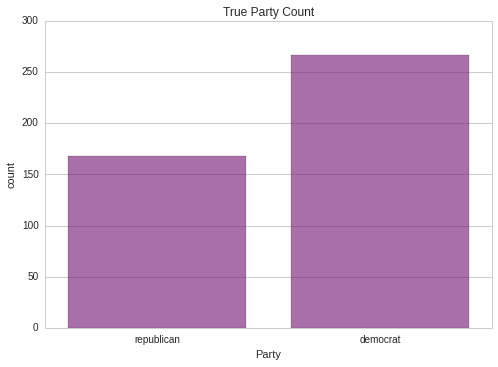

rep: 168 dem: 267


In [11]:
sns.countplot(x="Party", data=votes, color=data_c, alpha=data_al)
sns.plt.title("True Party Count")
plt.show()

dem = y_1.sum()
rep = len(y_1)-dem
print "rep:", rep, "dem:", dem

In [12]:
def dem_pred(data):
    dems = ["democrat" for _ in range(len(data))]
    return dems

def rep_pred(data):
    dems = ["republican" for _ in range(len(data))]
    return dems

print dem_pred([[0,1,0],[1],[1,2]])
print rep_pred([["a"],["a","b"],["a","b","c"]])

['democrat', 'democrat', 'democrat']
['republican', 'republican', 'republican']


In [13]:
dems_acc = accuracy_score(y_test, dem_pred(X_test))
print "dem pred acc:", dems_acc

dem pred acc: 0.633027522936


In [14]:
reps_acc = accuracy_score(y_test, rep_pred(X_test))
print "rep pred acc:", reps_acc

rep pred acc: 0.366972477064


###Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

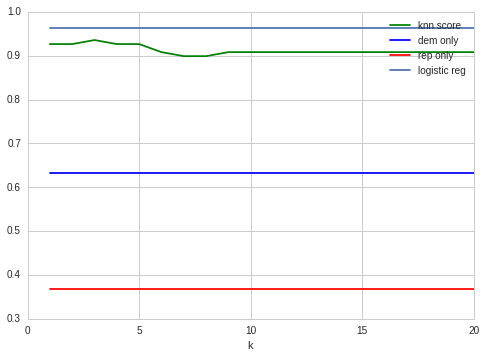

In [15]:
ax = plt.subplot(111)
plt.plot(ks, acc_k_score, label='knn score', color="green")
plt.plot(ks, [dems_acc]*len(ks), label='dem only', color="blue")
plt.plot(ks, [reps_acc]*len(ks), label='rep only', color="red")
plt.plot(ks, [logreg_acc]*len(ks), label='logistic reg')
ax.legend(loc='upper right')
plt.xlabel("k")
plt.show()

###Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

`from sklearn.learning_curve import learning_curve`  

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

`train_cv_err = np.mean(train_err, axis=1)`  
`test_cv_err = np.mean(ts_err, axis=1)`  

Before plotting `m` vs `train_cv_err` and `m` vs `test_cv_err`, where `train_err` and `test_err` are the vectors returned by the learning curve function. The `np.mean(...., axis=1)` means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [16]:
def plot_learning_curve(model, X_, y_):
    train_sizes, train_scores, test_scores = learning_curve(model, X_, y_)
    print "train sizes:", train_sizes, "\n", "train scores:\n", train_scores, "\n", "test scores:\n", test_scores
    train_cv_scores = np.mean(train_scores, axis=1)
    test_cv_scores = np.mean(test_scores, axis=1)
    
    print "mean train scores:", train_cv_scores, "\n", "mean test scores:", test_cv_scores

    ax = plt.subplot(111)
    plt.plot(train_sizes, train_cv_scores, label='training score', color="green")
    plt.plot(train_sizes, test_cv_scores, label='testing score', color="blue")
    ax.legend(loc='lower right')
    plt.xlabel("m")
    plt.show()

**Logistic Regression Training Curve**  

train sizes: [ 29  94 159 224 290] 
train scores:
[[ 1.          0.96551724  0.96551724]
 [ 0.9893617   0.9787234   0.9787234 ]
 [ 0.98113208  0.97484277  0.97484277]
 [ 0.98214286  0.97321429  0.98214286]
 [ 0.96896552  0.96551724  0.97241379]] 
test scores:
[[ 0.97241379  0.89655172  0.88965517]
 [ 0.97241379  0.91724138  0.89655172]
 [ 0.97241379  0.93103448  0.91724138]
 [ 0.97241379  0.95172414  0.93103448]
 [ 0.97931034  0.96551724  0.93793103]]
mean train scores: [ 0.97701149  0.9822695   0.9769392   0.97916667  0.96896552] 
mean test scores: [ 0.91954023  0.92873563  0.94022989  0.95172414  0.96091954]


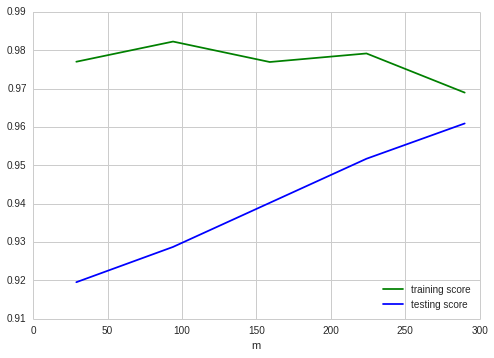

In [17]:
plot_learning_curve(linear_model.LogisticRegression(), X, y)

**KNN Training Curve**  

train sizes: [ 29  94 159 224 290] 
train scores:
[[ 0.89655172  0.96551724  0.96551724]
 [ 0.93617021  0.9787234   0.9787234 ]
 [ 0.94339623  0.97484277  0.97484277]
 [ 0.95089286  0.96875     0.97321429]
 [ 0.94137931  0.95172414  0.96896552]] 
test scores:
[[ 0.94482759  0.90344828  0.91034483]
 [ 0.96551724  0.92413793  0.91724138]
 [ 0.93793103  0.92413793  0.91724138]
 [ 0.93103448  0.93103448  0.93103448]
 [ 0.93103448  0.93793103  0.92413793]]
mean train scores: [ 0.94252874  0.96453901  0.96436059  0.96428571  0.95402299] 
mean test scores: [ 0.91954023  0.93563218  0.92643678  0.93103448  0.93103448]


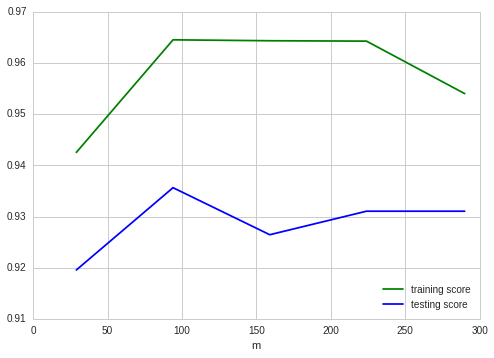

In [18]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=best_k), X, y)

###Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

`from sklearn.naive_bayes import GaussianNB`  

SVM (Support Vector Machine) Classifier

`from sklearn.svm import SVC`  

Decision Tree

`from sklearn.tree import DecisionTreeClassifier`  

Random Forest

`from sklearn.ensemble import RandomForestClassifier`

In [19]:
def get_accuracy(mod, X_, y_, X_ts, y_ts, name):
    mod.fit(X_, y_)
    predicted = mod.predict(X_ts)
    acc = accuracy_score(y_ts, predicted)
    print "%s acc:" %name, acc

In [20]:
get_accuracy(GaussianNB(), X_train, y_train, X_test, y_test, "Gaussian")

Gaussian acc: 0.926605504587


In [21]:
get_accuracy(SVC(), X_train, y_train, X_test, y_test, "SVC")

SVC acc: 0.954128440367


In [22]:
get_accuracy(DecisionTreeClassifier(), X_train, y_train, X_test, y_test, "DTC")

DTC acc: 0.954128440367


In [23]:
get_accuracy(RandomForestClassifier(), X_train, y_train, X_test, y_test, "DTC")

DTC acc: 0.935779816514


###Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

`from sklearn.cross_validation import cross_val_score`

Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [24]:
print "knn", np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=best_k), X, y))

knn 0.931034482759


In [25]:
print "logreg", np.mean(cross_val_score(linear_model.LogisticRegression(), X, y))

logreg 0.96091954023


In [26]:
print "gaussnb", np.mean(cross_val_score(GaussianNB(), X, y))

gaussnb 0.931034482759


In [27]:
print "svc", np.mean(cross_val_score(SVC(), X, y))

svc 0.954022988506


In [28]:
print "dectree", np.mean(cross_val_score(DecisionTreeClassifier(), X, y))

dectree 0.95632183908


In [29]:
print "ranfor", np.mean(cross_val_score(RandomForestClassifier(), X, y))

ranfor 0.958620689655


###Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [30]:
votes10 = pd.read_csv("house-votes-84.data", sep=",", na_values="?", names=col_names)
votes10 = votes10.replace("n", 0)
votes10 = votes10.replace("y", 1)
votes10.iloc[:10]

,Party,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
6,democrat,0,1,0,1,1,1,0,0,0,0,0,0,NaN,1,1,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,NaN,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
9,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,NaN,NaN


In [31]:
votes10 = votes10.fillna(votes10.mode().iloc[0])
votes10.iloc[:10]

,Party,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
6,democrat,0,1,0,1,1,1,0,0,0,0,0,0,1,1,1,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
9,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1


In [32]:
y10 = votes10["V16"]
X10 = votes10.iloc[:,1:16]
print X10.head(), '\n', y10.head()

   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13  V14  V15
0   0   1   0   1   1   1   0   0   0    1    0    1    1    1    0
1   0   1   0   1   1   1   0   0   0    0    0    1    1    1    0
2   0   1   1   0   1   1   0   0   0    0    1    0    1    1    0
3   0   1   1   0   1   1   0   0   0    0    1    0    1    0    0
4   1   1   1   0   1   1   0   0   0    0    1    0    1    1    1 
0    1
1    1
2    0
3    1
4    1
Name: V16, dtype: float64


In [33]:
print "logreg", np.mean(cross_val_score(linear_model.LogisticRegression(), X10, y10))

logreg 0.848223595584


In [34]:
print "knn", np.mean(cross_val_score(KNeighborsClassifier(), X10, y10))

knn 0.804496229815


###Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [35]:
movies = pd.read_csv("2013_movies.csv", sep=",")
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


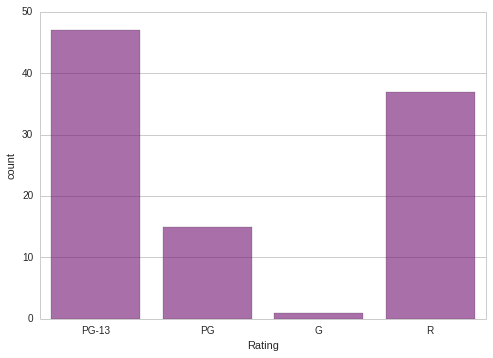

In [36]:
sns.countplot(x="Rating", data=movies, color=data_c, alpha=data_al)
sns.plt.show()

In [37]:
moviesb = movies.dropna()
Xm = moviesb[["Budget", "DomesticTotalGross", "Runtime"]]
ym = moviesb["Rating"]
Xm.head() 

,Budget,DomesticTotalGross,Runtime
0,130000000,424668047,146
1,200000000,409013994,129
2,150000000,400738009,108
3,76000000,368061265,98
4,225000000,291045518,143


In [38]:
ym.values #I think I somehow dropped the G value with the earlier dropna command

array(['PG-13', 'PG-13', 'PG', 'PG', 'PG-13', 'PG-13', 'PG-13', 'PG',
       'PG-13', 'PG-13', 'PG-13', 'PG', 'R', 'R', 'R', 'PG-13', 'R', 'R',
       'PG-13', 'PG-13', 'PG-13', 'R', 'PG-13', 'PG-13', 'R', 'PG-13', 'R',
       'PG', 'PG-13', 'R', 'PG-13', 'R', 'R', 'PG-13', 'R', 'PG', 'PG-13',
       'PG-13', 'PG-13', 'PG-13', 'PG', 'R', 'PG-13', 'PG-13', 'PG-13',
       'PG', 'R', 'PG', 'R', 'PG-13', 'PG-13', 'R', 'PG-13', 'PG-13', 'R',
       'PG-13', 'PG', 'PG', 'R', 'PG', 'R', 'R', 'PG-13', 'R', 'R', 'R',
       'PG-13', 'R', 'R', 'PG-13', 'PG-13', 'R', 'PG', 'R', 'PG-13',
       'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG', 'R', 'R', 'R', 'PG-13',
       'R', 'R', 'R'], dtype=object)

In [39]:
print "logreg", np.mean(cross_val_score(linear_model.LogisticRegression(), Xm, ym))
print "knn", np.mean(cross_val_score(KNeighborsClassifier(6), Xm, ym))

logreg 0.550602079912
knn 0.425259989053


In [40]:
def pg13_pred(data):
    pg13s = ["PG-13" for _ in range(len(data))]
    return pg13s

In [41]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.25, random_state=r_state)
Xm_train.head()

,Budget,DomesticTotalGross,Runtime
43,135000000,83028128,96
31,55000000,107100855,134
11,170000000,206362140,120
72,58000000,44672764,119
5,100000000,274092705,91


In [42]:
ym_train.head()

43       PG
31    PG-13
11    PG-13
72    PG-13
5     PG-13
Name: Rating, dtype: object

In [43]:
pg13_acc = accuracy_score(ym_test, pg13_pred(Xm_test))
print "PG13 pred acc:", pg13_acc

PG13 pred acc: 0.5


Always predicting PG-13 seems to actually be slightly more accurate than KNN for rating prediction. :(  
The logistic regression seems to be about 10% better than the stupid algorithm.

In [44]:
#print logreg.classes_[0], logreg.coef_[0]

In [45]:
logreg = linear_model.LogisticRegression()
logreg.fit(Xm, ym)
for x in range(len(logreg.classes_)):
    print logreg.classes_[x], "\t", logreg.coef_[x]

PG 	[ -6.98558915e-09  -5.01821745e-09  -1.61743117e-13]
PG-13 	[  8.69092546e-09  -4.44510939e-09  -4.67765450e-14]
R 	[ -1.78037425e-08   3.48107421e-09   9.80588274e-14]


The coefficients are the change of probability of the rating given a high value in the column. So if it's a high budget, it's a bit more likely to be PG-35, and if it has a high gross, it's a bit more likely to be R.

###Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data we talked about in class.

Get it from here: Haberman Survival Dataset

What is the average and standard deviation of the age of all of the patients?  
What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?  
What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?  
Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.  
What is the earliest year of surgery in this dataset?  
What is the most recent year of surgery?  
Use logistic regression to predict survival after 5 years. How well does your model do?  
What are the coefficients of logistic regression? Which features affect the outcome how?  
Draw the learning curve for logistic regression in this case.  

Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 years

In [46]:
haber_cols = ["Age", "19YR", "Nodes", "SStatus"]
haber = pd.read_csv("haberman.data", sep=",", names=haber_cols)
haber.head()

,Age,19YR,Nodes,SStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [47]:
print "All patients"
avgage = haber["Age"].mean()
agestd = haber["Age"].std()
print "avg age: ", avgage, "\nage std:", agestd

All patients
avg age:  52.4575163399 
age std: 10.8034523493


In [48]:
print "Of patients who survived"
habersurvived = haber[haber["SStatus"] == 1]
print habersurvived.head()
yesage = habersurvived["Age"].mean()
yesstd = habersurvived["Age"].std()
print "avg age: ", yesage, "\nage std:", yesstd

Of patients who survived
   Age  19YR  Nodes  SStatus
0   30    64      1        1
1   30    62      3        1
2   30    65      0        1
3   31    59      2        1
4   31    65      4        1
avg age:  52.0177777778 
age std: 11.0121541799


In [49]:
print "Of patients who died"
haberno = haber[haber["SStatus"] == 2]
print haberno.head()
noage = haberno["Age"].mean()
nostd = haberno["Age"].std()
print "avg age: ", noage, "\nage std:", nostd

Of patients who died
    Age  19YR  Nodes  SStatus
7    34    59      0        2
8    34    66      9        2
24   38    69     21        2
34   39    66      0        2
43   41    60     23        2
avg age:  53.6790123457 
age std: 10.1671372083


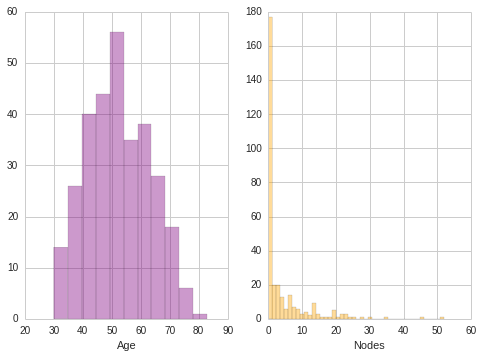

In [50]:
ax = plt.subplot(121)
sns.distplot(haber["Age"], kde=False, color=data_c)

ax2 = plt.subplot(122)
sns.distplot(haber["Nodes"], kde=False, color=pred_c)
sns.plt.show()

In [51]:
min(haber["19YR"])

58

In [52]:
max(haber["19YR"])

69

In [53]:
Xh = haber[["Age", "19YR", "Nodes"]]
yh = haber["SStatus"]
print Xh.head(), "\n", yh.head()

   Age  19YR  Nodes
0   30    64      1
1   30    62      3
2   30    65      0
3   31    59      2
4   31    65      4 
0    1
1    1
2    1
3    1
4    1
Name: SStatus, dtype: int64


In [54]:
logreg = linear_model.LogisticRegression()
logreg.fit(Xh, yh)
pred = logreg.predict(Xh)
print "accuracy: ", accuracy_score(yh, pred)
print logreg.classes_, "\n", logreg.coef_

accuracy:  0.748366013072
[1 2] 
[[ 0.01854689 -0.0345458   0.08812314]]


These coefficients mean that a higher age is more likely to die, a higher year (more recent) is less likely to die, and a higher number of nodes is more likely to die.

train sizes: [ 20  66 112 158 204] 
train scores:
[[ 0.85        0.9         0.9       ]
 [ 0.8030303   0.81818182  0.81818182]
 [ 0.75        0.77678571  0.77678571]
 [ 0.73417722  0.75316456  0.77848101]
 [ 0.74019608  0.75490196  0.74019608]] 
test scores:
[[ 0.75490196  0.73529412  0.73529412]
 [ 0.75490196  0.68627451  0.29411765]
 [ 0.74509804  0.74509804  0.28431373]
 [ 0.7745098   0.73529412  0.66666667]
 [ 0.76470588  0.71568627  0.7745098 ]]
mean train scores: [ 0.88333333  0.81313131  0.76785714  0.75527426  0.74509804] 
mean test scores: [ 0.74183007  0.57843137  0.59150327  0.7254902   0.75163399]


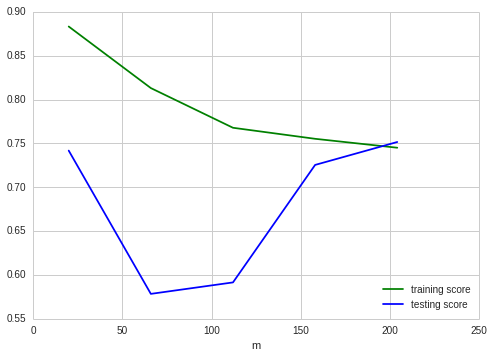

In [55]:
plot_learning_curve(linear_model.LogisticRegression(), Xh, yh)